# COVID-19 Data (API).
### COVID-19 World Data.
[site](https://covid19api.com/) | [API info](https://documenter.getpostman.com/view/10808728/SzS8rjbc?version=latest)



In [0]:
# necessary imports for notebook.
import pandas as pd
import numpy as np
import requests
import json
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
''' COVID-19 : Countries Daily Summary Total'''
# COVID-19 Data.
'''https://covid19api.com/'''
'''https://documenter.getpostman.com/view/10808728/SzS8rjbc?version=latest'''
response = requests.get("https://api.covid19api.com/all")
# show the status code.
print(response.status_code)
covid_cs = response.json()
covid_countriessummary = pd.json_normalize(covid_cs)
# show the data frame shape.
print(covid_countriessummary.shape)
# show the data frame with headers.
covid_countriessummary.head()

200
(340761, 12)


,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-22T00:00:00Z
1,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-23T00:00:00Z
2,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-24T00:00:00Z
3,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-25T00:00:00Z
4,Afghanistan,AF,,,,33.94,67.71,0,0,0,0,2020-01-26T00:00:00Z


In [0]:
# new data frame.
df = covid_countriessummary.copy()

In [0]:
# clean up the data.
df['Date'] = df['Date'].str[:10]
df = df.rename(columns={"CountryCode": "Code"})
df = df.drop(columns=['Province', 'City', 'CityCode', 'Active', 'Lat', 'Lon'])
df = df[['Date', 'Country', 'Code', 'Confirmed', 'Recovered', 'Deaths']]
df = df.groupby(['Date', 'Country', 'Code']).agg({'Confirmed':'sum', 'Deaths': 'sum', 'Recovered': 'sum'}).reset_index()

In [5]:
# final data frame.

# show the data frame shape.
print(df.shape)
# show the data frame with headers.
df.head()

(17751, 6)


,Date,Country,Code,Confirmed,Deaths,Recovered
0,2020-01-22,Afghanistan,AF,0,0,0
1,2020-01-22,Albania,AL,0,0,0
2,2020-01-22,Algeria,DZ,0,0,0
3,2020-01-22,Andorra,AD,0,0,0
4,2020-01-22,Angola,AO,0,0,0


In [6]:
# set yesterdays date.
yesterday = df['Date'].iloc[-1]
# data frame of the countries with the highest totals.
df1 = (df[df['Date'].eq(yesterday)].sort_values(by='Deaths', ascending=False).head(20))
# show the date for yesterday.
print(yesterday)

2020-04-27


In [7]:
# top 20 countries.
countries = df1['Country'].unique()
# filter data frame with top 20 countries.
df = df[df['Country'].isin(countries)]
# show the data frame shape.
print(df.shape)
# show the data frame headers
df.head()

(1940, 6)


,Date,Country,Code,Confirmed,Deaths,Recovered
16,2020-01-22,Belgium,BE,0,0,0
23,2020-01-22,Brazil,BR,0,0,0
30,2020-01-22,Canada,CA,0,0,0
35,2020-01-22,China,CN,548,17,28
58,2020-01-22,France,FR,0,0,0


<BarContainer object of 20 artists>

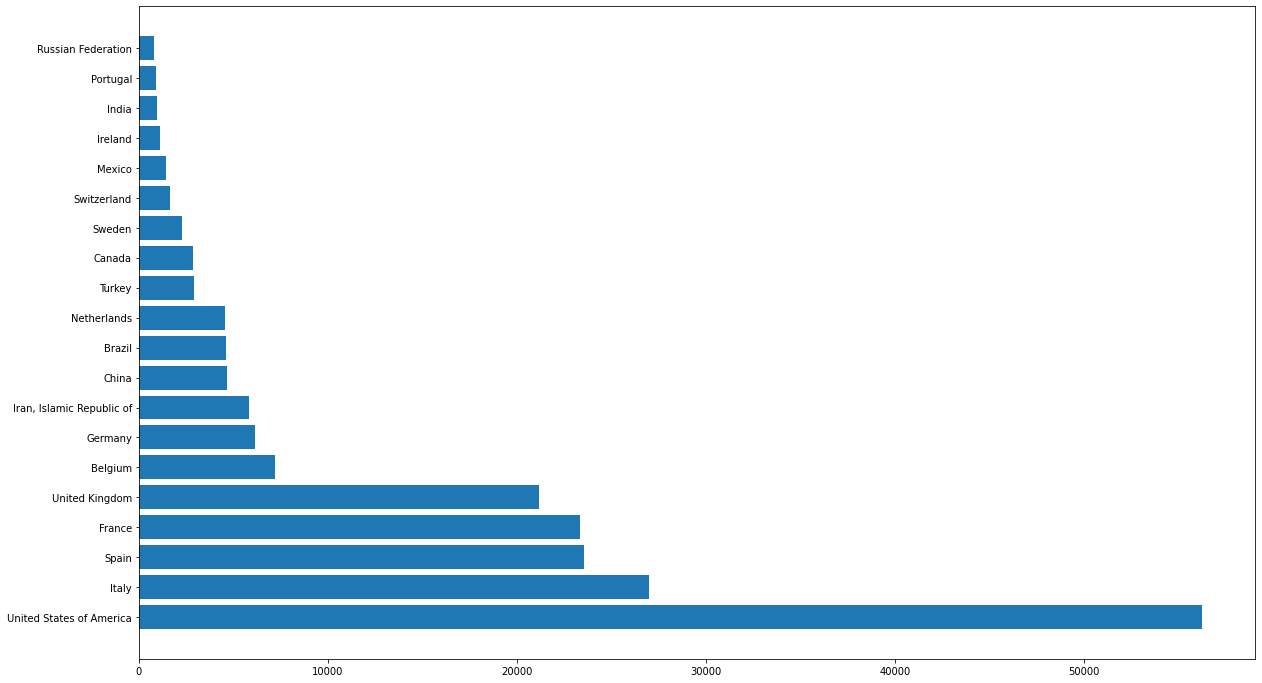

In [8]:
# show bar chart of top 20 countries and the count from yesterday.
fig, ax = plt.subplots(figsize=(20, 12))
ax.barh(df1['Country'], df1['Deaths'])

In [9]:
# set the coutry codes to a list.
countrycodes = df1['Code'].to_list()
# set colors to the list.
colors = dict(zip(
    (countrycodes),
    ["#adb0ff", "#ffb3ff", "#90d595", "#e48381", "#aafbff",
     "#adb0ff", "#ffb3ff", "#90d595", "#e48381", "#aafbff", 
     "#adb0ff", "#ffb3ff", "#90d595", "#e48381", "#aafbff", 
     "#adb0ff", "#ffb3ff", "#90d595", "#e48381", "#aafbff", "#ffb3ff"]
    ))
# set index to dict.
group_lk = df1.set_index('Country')['Code'].to_dict()
# show the colors.
print(colors)
# show the group.
print(group_lk)

{'US': '#adb0ff', 'IT': '#ffb3ff', 'ES': '#90d595', 'FR': '#e48381', 'GB': '#aafbff', 'BE': '#adb0ff', 'DE': '#ffb3ff', 'IR': '#90d595', 'CN': '#e48381', 'BR': '#aafbff', 'NL': '#adb0ff', 'TR': '#ffb3ff', 'CA': '#90d595', 'SE': '#e48381', 'CH': '#aafbff', 'MX': '#adb0ff', 'IE': '#ffb3ff', 'IN': '#90d595', 'PT': '#e48381', 'RU': '#aafbff'}
{'United States of America': 'US', 'Italy': 'IT', 'Spain': 'ES', 'France': 'FR', 'United Kingdom': 'GB', 'Belgium': 'BE', 'Germany': 'DE', 'Iran, Islamic Republic of': 'IR', 'China': 'CN', 'Brazil': 'BR', 'Netherlands': 'NL', 'Turkey': 'TR', 'Canada': 'CA', 'Sweden': 'SE', 'Switzerland': 'CH', 'Mexico': 'MX', 'Ireland': 'IE', 'India': 'IN', 'Portugal': 'PT', 'Russian Federation': 'RU'}


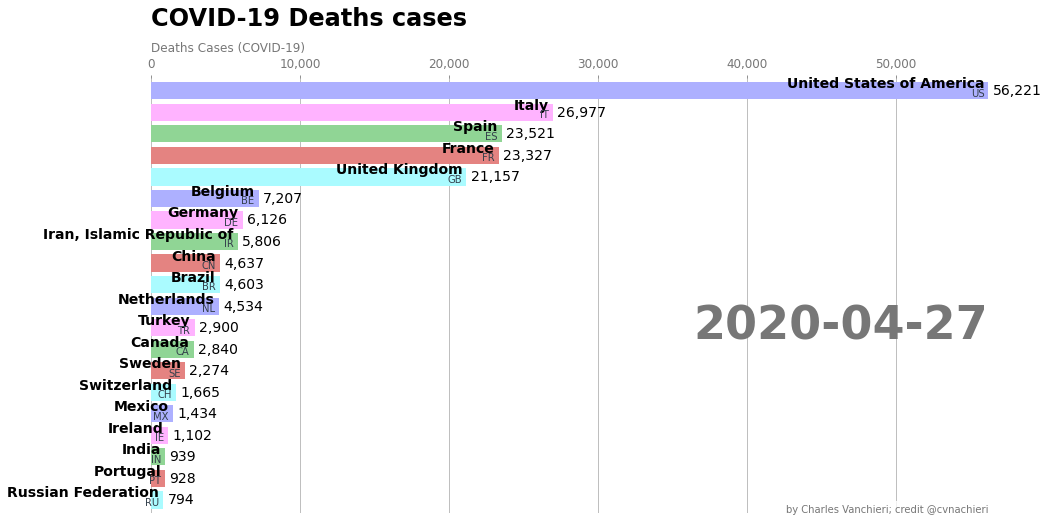

In [10]:
# function to label, color the bar chart.
def draw_barchart(datetime):
    df1 = df[df['Date'].eq(datetime)].sort_values(by='Deaths', ascending=True).tail(20)
    
    ax.clear()
    ax.barh(df1['Country'], df1['Deaths'], color=[colors[group_lk[x]] for x in df1['Country']])
    dx = df1['Deaths'].max() / 200
    for i, (Deaths, Country) in enumerate(zip(df1['Deaths'], df1['Country'])):
        ax.text(Deaths-dx, i,     Country,                   size=14, weight=600, ha='right', va='bottom')
        ax.text(Deaths-dx, i-.25, group_lk[Country],         size=10, color='#333F4B', ha='right', va='baseline')
        ax.text(Deaths+dx, i,     f'{Deaths:,.0f}',       size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, datetime, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Deaths Cases (COVID-19)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'COVID-19 Deaths cases',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by Charles Vanchieri; credit @cvnachieri', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)

fig, ax = plt.subplots(figsize=(15, 8))   
# use the function on yesterdays date.
draw_barchart(yesterday)

In [0]:
# create a list of the dates in the data frame.
time = list(df['Date'].unique())
# set the size of the graph.
fig, ax = plt.subplots(figsize=(20, 12))
# creat the bar chart race animation.
animator = animation.FuncAnimation(fig, draw_barchart, frames=(time), interval=350)
HTML(animator.to_jshtml())

![barchartrace](https://github.com/CVanchieri/CVanchieri.github.io/blob/master/img/Covid19DeathsBarChartRacePost/COVID19ConfirmedDeathsCountries.png?raw=true)


